In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorlayer as tl
import numpy as np

In [2]:
sess = tf.InteractiveSession()
X1,Y1,X2,Y2,X3,Y3 = tl.files.load_mnist_dataset()

x = tf.placeholder(tf.float32, shape=[None, 784], name="x")
y = tf.placeholder(tf.int64, shape=[None,], name="y")

net = tl.layers.InputLayer(x, name="input")
net = tl.layers.ReshapeLayer(net, shape=[-1, 28, 28, 1], name="reshape")
net = tl.layers.Conv2d(net, n_filter=32, filter_size=(5,5), act=tf.nn.relu, name="conv1")
net = tl.layers.MaxPool2d(net, filter_size=(2,2), name="pool1")
net = tl.layers.Conv2d(net, n_filter=32, filter_size=(3,3), act=tf.nn.relu, name="conv2")
net = tl.layers.MaxPool2d(net, filter_size=(2,2), name="pool2")
net = tl.layers.FlattenLayer(net, name="flatten")
net = tl.layers.DenseLayer(net, n_units=128, act=tf.nn.relu, name="dense")
net = tl.layers.DenseLayer(net, n_units=10, act=tf.identity, name="softmax")
out = net.outputs

Load or Download MNIST > data\mnist



Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
data\mnist\train-images-idx3-ubyte.gz



Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.



Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
data\mnist\t10k-images-idx3-ubyte.gz



Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
  [TL] InputLayer  input: (?, 784)
  [TL] ReshapeLayer reshape: (?, 28, 28, 1)
  [TL] Conv2dLayer conv1: shape:[5, 5, 1, 32] strides:[1, 1, 1, 1] pad:SAME act:relu
  [TL] PoolLayer   pool1: ksize:[1, 2, 2, 1] strides:[1, 2, 2, 1] padding:SAME pool:max_pool
  [TL] Conv2dLayer conv2: shape:[3, 3, 32, 32] strides:[1, 1, 1, 1] pad:SAME act:relu
  [TL] PoolLayer   pool2: ksize:[1, 2, 2, 1] strides:[1, 2, 2, 1] padding:SAME pool:max_pool
  [TL] FlattenLayer flatten: 1568
  [TL] DenseLayer  dense: 128 relu
  [TL] DenseLayer  softmax: 10 identity


In [12]:
filename = r"C:\Users\zhdon\PycharmProjects\dzml\mmml\example\tensorlayer\model.npz"
tl.files.load_and_assign_npz(sess, filename, net)

[*] Load C:\Users\zhdon\PycharmProjects\dzml\mmml\example\tensorlayer\model.npz SUCCESS!


array([2], dtype=int64)

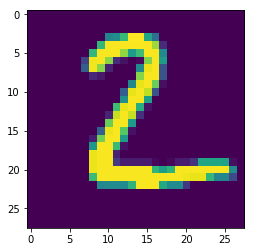

In [21]:
plt.imshow(np.reshape(np.array(X3[1,:]), newshape=[28,28]))
y_op = tf.argmax(tf.nn.softmax(out), 1)
tl.utils.predict(sess, net, X3[1:2,:], x, y_op)